In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Mapeamento dos domínios

In [2]:
df = pd.read_csv('Data/processed_df.csv')

In [3]:
ci_map = {
    'cognitive': ['semantic_memory', 'verbal_fluency', 'memory_recall', 'temporal_orientation'],
    'psychologicaç': ['depression_scale', 'sleep_quality'],
    'locomotor': ['gait_speed', 'balance'],
    'vitality': ['imc', 'handgrip'],
    'sensory': ['distance_vision', 'near_vision', 'hearing_deficit']
}
ci_cols = []
[ci_cols.extend(value) for value in ci_map.values()]

ci_cols

['semantic_memory',
 'verbal_fluency',
 'memory_recall',
 'temporal_orientation',
 'depression_scale',
 'sleep_quality',
 'gait_speed',
 'balance',
 'imc',
 'handgrip',
 'distance_vision',
 'near_vision',
 'hearing_deficit']

### Limpando

In [4]:
df[ci_cols].isna().sum()

semantic_memory          581
verbal_fluency           343
memory_recall            328
temporal_orientation     328
depression_scale        1109
sleep_quality             27
gait_speed               572
balance                  975
imc                      244
handgrip                 539
distance_vision           25
near_vision               19
hearing_deficit           13
dtype: int64

In [5]:
df_clean = df.dropna(subset=ci_cols)

#### Normalizando

In [14]:
df_pca = df_clean[ci_cols]

# Initialize MinMaxScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = scaler.fit_transform(df_pca)
df_scaled = pd.DataFrame(df_scaled, columns=df_pca.columns)
df_scaled

,semantic_memory,verbal_fluency,memory_recall,temporal_orientation,depression_scale,sleep_quality,gait_speed,balance,imc,handgrip,distance_vision,near_vision,hearing_deficit
0,0.268168,0.660681,1.034159,0.546844,-1.099613,-0.634904,-0.382647,0.446861,-0.865233,-0.189092,-0.457474,-0.578635,-0.314207
1,0.268168,-0.956558,-1.467657,0.546844,-1.099613,-1.265021,-0.458307,0.446861,0.783476,-0.054113,0.651740,0.533180,2.398803
2,-0.879991,-0.263456,-0.216749,0.546844,0.613455,0.625330,0.031590,0.446861,-0.886024,-1.167691,0.651740,1.644995,-0.314207
3,-2.028151,-0.494490,-0.216749,0.546844,-0.528590,-0.634904,0.415563,0.446861,0.008885,-0.222837,-0.457474,-0.578635,1.042298
4,0.268168,-0.956558,-0.842203,0.546844,0.613455,0.625330,0.871413,-2.215916,-1.576843,-1.066457,1.760953,0.533180,-0.314207
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,0.268168,0.891716,-0.216749,0.546844,1.184478,3.145799,-0.467764,-0.884527,-0.149598,-0.155347,-0.457474,-0.578635,-1.670712
7236,1.416328,1.353784,1.034159,0.546844,0.042432,-0.004787,-0.456415,-0.884527,1.496269,-0.357816,0.651740,0.533180,1.042298
7237,0.268168,0.198613,0.408705,0.546844,-0.528590,-1.265021,-0.235111,0.446861,-0.524605,-0.661519,0.651740,-0.578635,-0.314207
7238,1.416328,0.891716,1.659612,0.546844,-1.670636,-0.634904,-0.093249,-0.884527,0.274183,-0.357816,-0.457474,-0.578635,-0.314207


#### Observando correlações

#### Aplicando o PCA

- Para toda a capacidade intrinseca

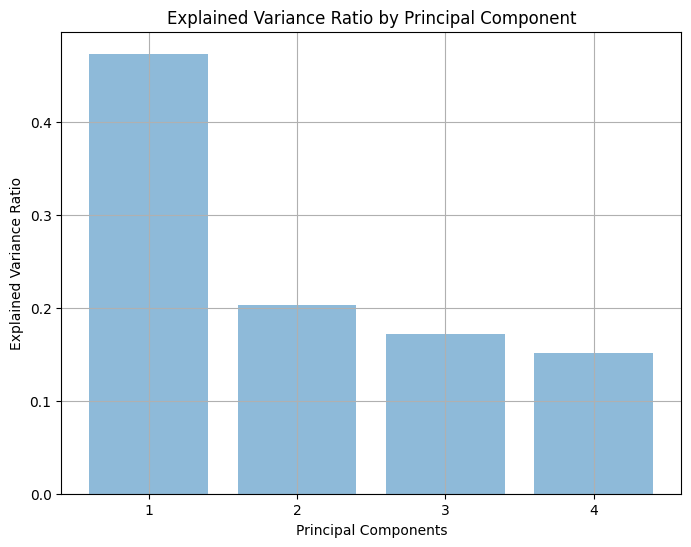

In [16]:
from sklearn.decomposition import PCA

# Initialize PCA with desired number of components
pca = PCA()  # We'll reduce the data to 2 dimensions

# Fit PCA to the data and transform the data
transformed_data = pca.fit_transform(df_scaled[ci_map['cognitive']])

explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

In [18]:
explained_variance_ratio.cumsum()

array([0.47322329, 0.67632408, 0.84840056, 1.        ])

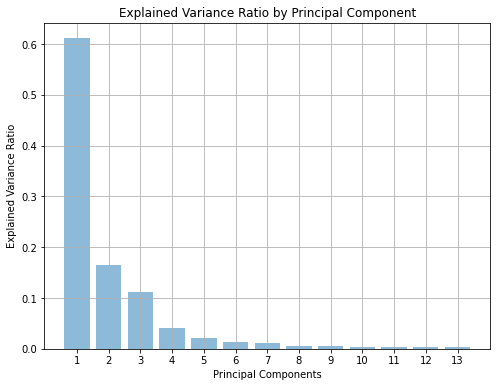

In [41]:
from sklearn.decomposition import PCA

# Initialize PCA with desired number of components
pca = PCA()  # We'll reduce the data to 2 dimensions

# Fit PCA to the data and transform the data
transformed_data = pca.fit_transform(df_pca)

explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

In [43]:
explained_variance_ratio.cumsum()

array([0.611738  , 0.77758709, 0.88848243, 0.92943469, 0.95143436,
       0.96472436, 0.97612396, 0.98256833, 0.98736369, 0.99076   ,
       0.99406315, 0.9971616 , 1.        ])

### Aplicando o AUTOENCONDER

In [9]:
# Define dataset

df_autoencoder = df_clean[ci_cols]

In [10]:
df_autoencoder.dtypes

semantic_memory         float64
verbal_fluency          float64
memory_recall           float64
temporal_orientation    float64
depression_scale        float64
sleep_quality           float64
gait_speed              float64
balance                 float64
imc                     float64
handgrip                float64
distance_vision         float64
near_vision             float64
hearing_deficit         float64
dtype: object

In [11]:
df_autoencoder

,semantic_memory,verbal_fluency,memory_recall,temporal_orientation,depression_scale,sleep_quality,gait_speed,balance,imc,handgrip,distance_vision,near_vision,hearing_deficit
0,3.0,15.0,6.0,4.0,2.0,3.0,3.500,4.0,23.343753,24.333333,2.0,2.0,2.0
1,3.0,8.0,2.0,4.0,2.0,2.0,3.300,4.0,31.863105,25.666667,3.0,3.0,4.0
2,2.0,11.0,4.0,4.0,5.0,5.0,4.595,4.0,23.236321,14.666667,3.0,4.0,2.0
3,1.0,10.0,4.0,4.0,3.0,3.0,5.610,4.0,27.860572,24.000000,2.0,2.0,3.0
5,3.0,8.0,3.0,4.0,5.0,5.0,6.815,2.0,19.666667,15.666667,4.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9403,3.0,16.0,4.0,4.0,6.0,9.0,3.275,3.0,27.041644,24.666667,2.0,2.0,1.0
9404,4.0,18.0,6.0,4.0,4.0,4.0,3.305,3.0,35.546307,22.666667,3.0,3.0,3.0
9405,3.0,13.0,5.0,4.0,3.0,2.0,3.890,4.0,25.103878,19.666667,3.0,2.0,2.0
9407,4.0,16.0,7.0,4.0,1.0,3.0,4.265,3.0,29.231439,22.666667,2.0,2.0,2.0


In [23]:


# Split the data into training and testing sets
X_train, X_test = train_test_split(df_autoencoder, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [24]:
def build_autoencoder(input_shape, architecture):
    input_layer = Input(shape=input_shape)
    encoder_layer = input_layer
    arch_size = len(architecture)
    # Encoder layers
    for neurons in architecture[:arch_size//2]:
        encoder_layer = Dense(neurons, activation='relu')(encoder_layer)

    # Bottleneck layer
    encoder_output = Dense(architecture[arch_size//2], activation='linear', name="bottleneck")(encoder_layer)

    decoder_layer = encoder_output

    # Decoder layers
    for neurons in architecture[arch_size//2 + 1:]:
        decoder_layer = Dense(neurons, activation='relu')(decoder_layer)

    output_layer = Dense(input_shape[0], activation='sigmoid')(decoder_layer)

    # Define autoencoder model
    autoencoder = Model(input_layer, output_layer)

    # Compile the model
    autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

    return autoencoder

In [25]:
from sklearn.metrics import r2_score
def train_autoencoder(X_train_scaled, architecture):
    input_shape = X_train_scaled.shape[1:]
    autoencoder = build_autoencoder(input_shape, architecture)
    print(autoencoder.summary())
    autoencoder.fit(X_train_scaled, X_train_scaled, batch_size=32, epochs=50, verbose=0)
    decoded_data = autoencoder.predict(X_train_scaled)
    r2 = r2_score(X_train_scaled, decoded_data)
    return r2


In [28]:
architectures = [(10, 5, 2, 5, 10)]  # Example architectures


train_r2_scores = []

for architecture in architectures:
    train_r2 = train_autoencoder(X_train_scaled, architecture)
    train_r2_scores.append(train_r2)

print("Training R2 Scores:")
for i, architecture in enumerate(architectures):
    print(f"Architecture {architecture}: R2 = {train_r2_scores[i]}")

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 2)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 13)             │           143 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

None
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training R2 Scores:
Architecture (10, 5, 2, 5, 10): R2 = 0.3062091827698895


In [31]:
autoencoder = build_autoencoder((13,), (10, 5, 2, 5, 10))

autoencoder.fit(X_train_scaled, X_train_scaled, batch_size=32, epochs=50, verbose=0)

In [ ]:
autoencoder